In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
zdata=pd.read_csv("Zoo.csv")

In [3]:
zdata.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zdata.shape

(101, 18)

In [5]:
zdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zdata.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
zdata['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

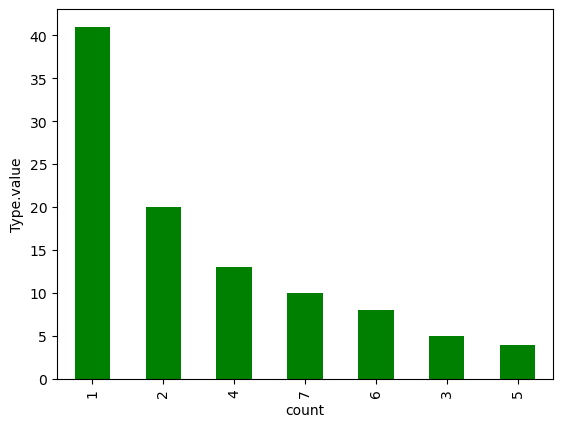

In [9]:
zdata.type.value_counts().plot(kind='bar', color='green')
plt.xlabel('count')
plt.ylabel('Type.value')
plt.show()

In [10]:
zdata.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

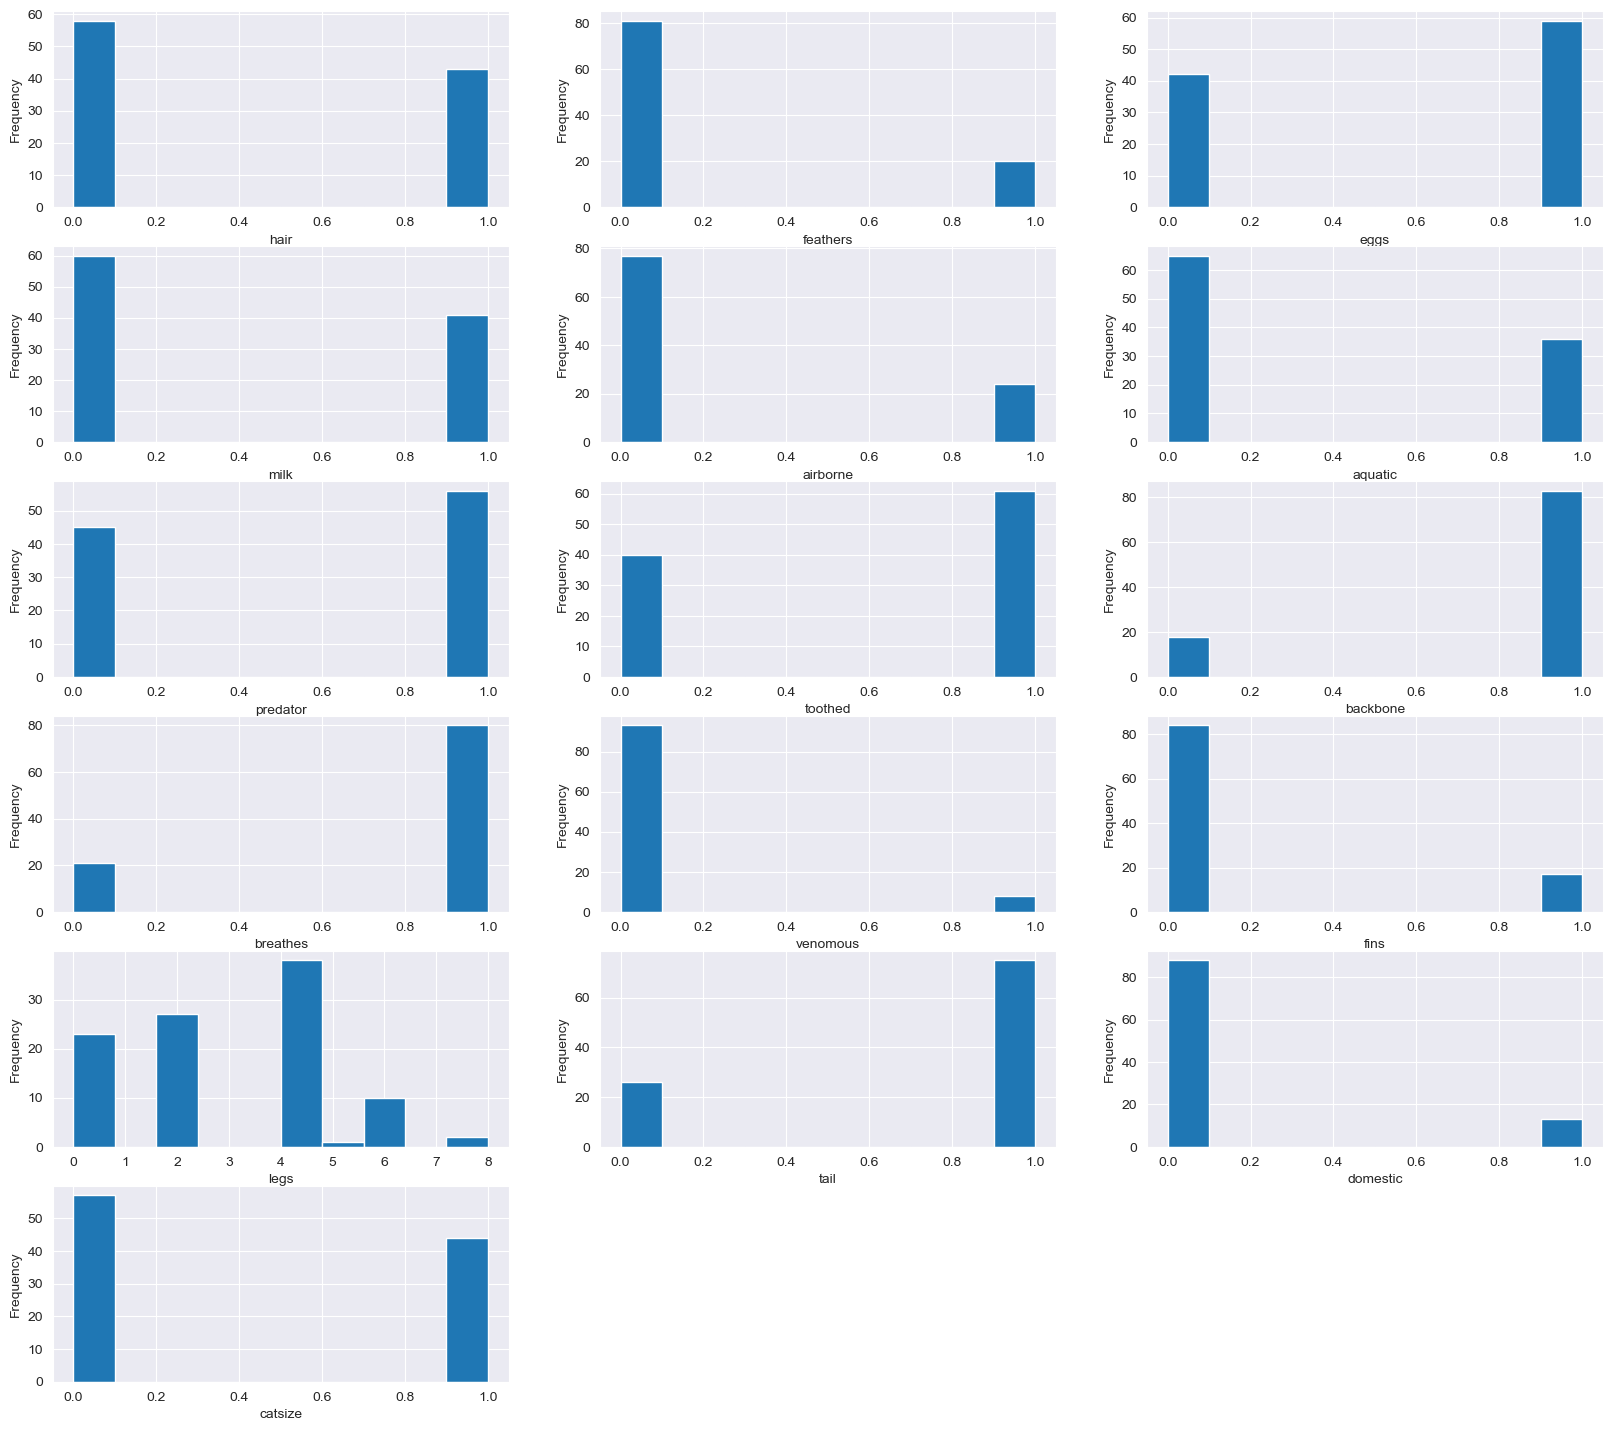

In [12]:
column=[ 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
sns.set_style(style='darkgrid')
fig=plt.figure(figsize=(20,30))
i=0
for column in column:
    sub=fig.add_subplot(10,3,i+1)
    sub.set_xlabel(column)
    zdata[column].plot(kind='hist')
    i=i+1

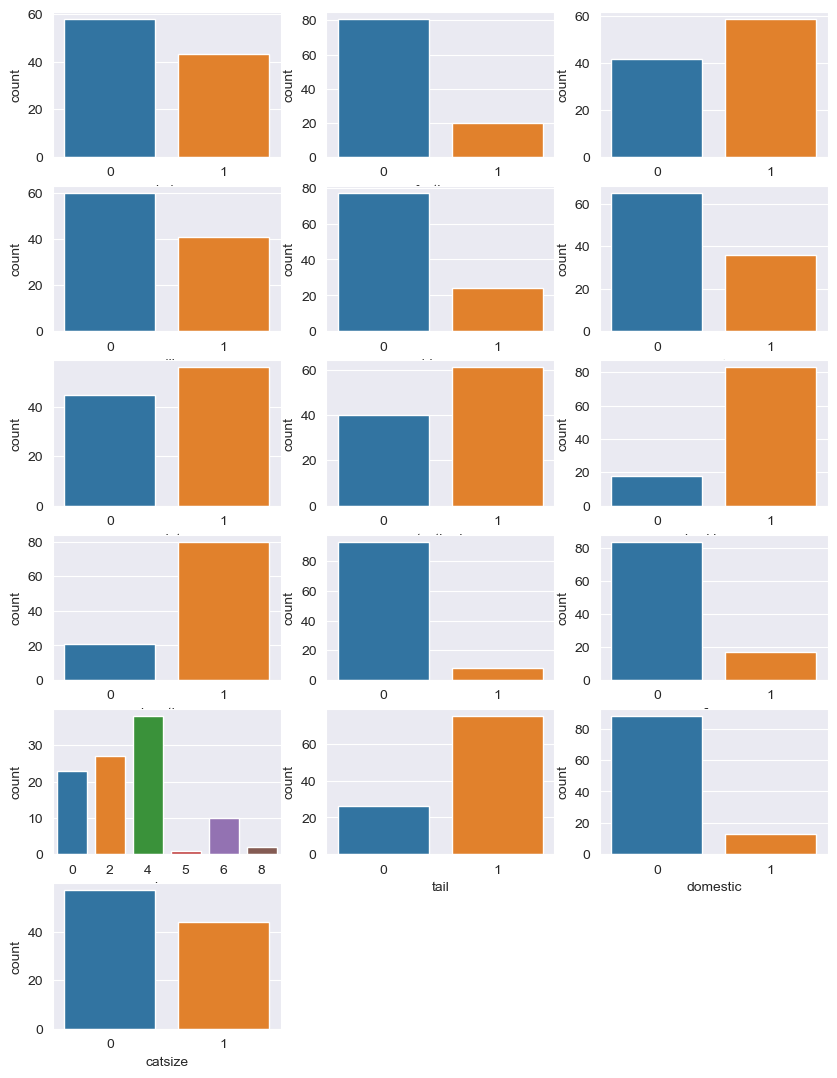

In [13]:
column1=[ 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
fig=plt.figure(figsize=(10,20))
for i in range(len(column1)):
    column=column1[i]
    sub=fig.add_subplot(9,3,i+1)
    chart=sns.countplot(data = zdata, x=column)

In [15]:
x=zdata.iloc[:,1:17]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
y=zdata.iloc[:,-1]
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,shuffle=True)

In [18]:
model=KNeighborsClassifier(n_neighbors=14)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       1.00      1.00      1.00         4
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         2

    accuracy                           0.81        31
   macro avg       0.52      0.65      0.57        31
weighted avg       0.73      0.81      0.76        31



In [19]:
n_neighbors=[2*i+1 for i in range(0,27)]
for n in n_neighbors:
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy_score(y_test,pred)
    
    print(classification_report(y_test,pred),n)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31
 1
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy         

# VISUALIZING THE CV RESULTS

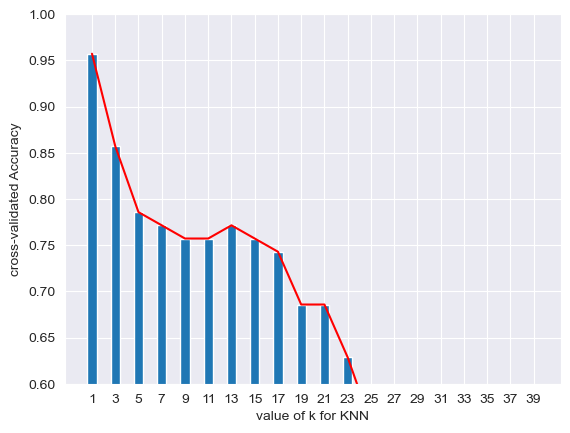

In [20]:
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())
    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color="red")
    
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [21]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.94      0.98      0.96        31
weighted avg       0.96      0.94      0.94        31

